In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('motorbike-injuries.csv')
# Create a pivot table to display the count and percentage of age groups in terms of roles
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['≤20 years', '21-30 years', '31-40 years', '41-50 years', '>50 years']

df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_table = pd.crosstab(df['Age Group'], df['roles'])

# Add percentage to the table
age_group_percentage = age_group_table.div(age_group_table.sum(axis=0), axis=1) * 100
age_group_combined = age_group_table.astype(str) + " (" + age_group_percentage.round(1).astype(str) + "%)"

# Display the table
display(age_group_combined)

# Calculate and display p-value using Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(age_group_table)
print(f"P-value from Chi-Square test: {p}")
# Display a seaborn heatmap for the age group percentage



roles,Passenger:,Pedestrian:,operator
Age Group,,,
≤20 years,7 (14.9%),2 (9.5%),3 (5.3%)
21-30 years,14 (29.8%),4 (19.0%),21 (36.8%)
31-40 years,10 (21.3%),3 (14.3%),19 (33.3%)
41-50 years,11 (23.4%),3 (14.3%),7 (12.3%)
>50 years,5 (10.6%),9 (42.9%),7 (12.3%)


P-value from Chi-Square test: 0.014574607365032145


# age group

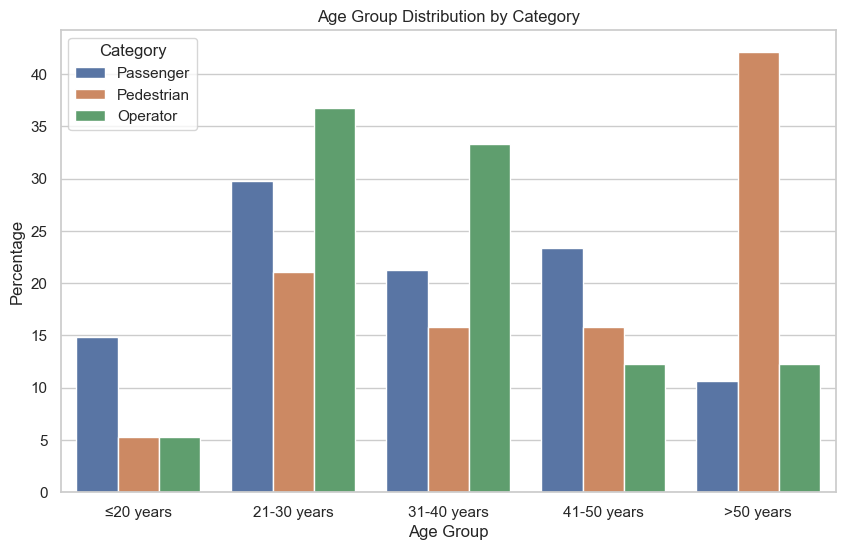

C:\Users\user\AppData\Local\Temp\ipykernel_6568\1157652444.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category')


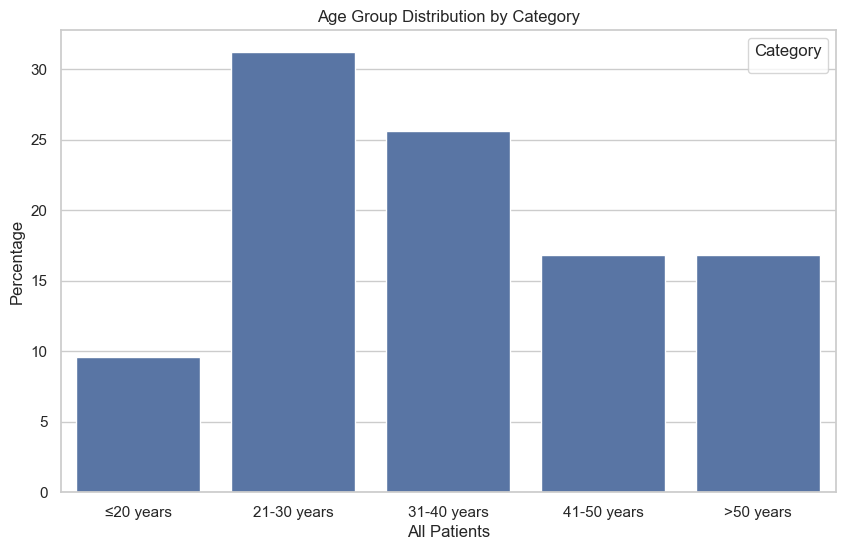

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare the data for the bar chart
age_group_data = {
    'Age Group': ['≤20 years', '21-30 years', '31-40 years', '41-50 years', '>50 years'],
    'All Patients': [9.6, 31.2, 25.6, 16.8, 16.8],
    'Passenger': [14.9, 29.8, 21.3, 23.4, 10.6],
    'Pedestrian': [5.3, 21.1, 15.8, 15.8, 42.1],
    'Operator': [5.3, 36.8, 33.3, 12.3, 12.3]
}

# Convert the data into a pandas DataFrame
age_group_df = pd.DataFrame(age_group_data)

# Melt the DataFrame for seaborn compatibility
melted_df = age_group_df.melt(id_vars='Age Group', var_name='Category', value_name='Percentage')

# Create the bar chart excluding 'All Patients'
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df[melted_df['Category'] != 'All Patients'], x='Age Group', y='Percentage', hue='Category')
plt.title('Age Group Distribution by Category')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(title='Category')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df[melted_df['Category'] == 'All Patients'], x='Age Group', y='Percentage')
plt.title('Age Group Distribution by Category')
plt.ylabel('Percentage')
plt.xlabel('All Patients')
plt.legend(title='Category')
plt.show()


| Age Group   | All Patients    | Passenger       | Pedestrian      | Operator       |
|-------------|-----------------|-----------------|-----------------|----------------|
| ≤20 years   | 11 (7.2%)       | 7 (14.9%)       | 1 (5.3%)        | 3 (5.3%)       |
| 21-30 years | 39 (31.2%)      | 14 (29.8%)      | 4 (21.1%)       | 21 (36.8%)     |
| 31-40 years | 32 (25.6%)      | 10 (21.3%)      | 3 (15.8%)       | 19 (33.3%)     |
| 41-50 years | 21 (16.8%)      | 11 (23.4%)      | 3 (15.8%)       | 7 (12.3%)      |
| >50 years   | 21 (16.8%)      | 5 (10.6%)       | 8 (42.1%)       | 7 (12.3%)      |


### gender plan

# gender plan here and tables analysis

# gender plan here and tables analysis

roles,Passenger:,Pedestrian:,operator
gender,,,
Female,22 (46.8%),9 (42.9%),0 (0.0%)
male,25 (53.2%),12 (57.1%),57 (100.0%)


P-value from Chi-Square test: 2.9519516445683918e-08


<Figure size 1000x600 with 0 Axes>

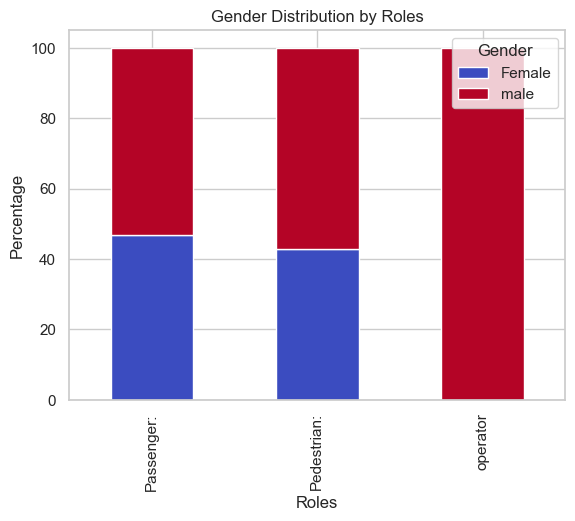

In [ ]:
# Create a pivot table to display the count and percentage of genders in terms of roles
gender_table = pd.crosstab(df['gender'], df['roles'])

# Add percentage to the table
gender_percentage = gender_table.div(gender_table.sum(axis=0), axis=1) * 100
gender_combined = gender_table.astype(str) + " (" + gender_percentage.round(1).astype(str) + "%)"

# Display the table
display(gender_combined)

# Calculate and display p-value using Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(gender_table)
print(f"P-value from Chi-Square test: {p}")

# Display a seaborn heatmap for the gender percentage
plt.figure(figsize=(10, 6))
gender_percentage.T.plot(kind='bar', stacked=True, colormap="coolwarm")
plt.title('Gender Distribution by Roles')
plt.ylabel('Percentage')
plt.xlabel('Roles')
plt.legend(title='Gender')
plt.show()


### Gender Distribution by Roles
### Gender Distribution by Roles

| Gender | Passenger (%) | Pedestrian (%) | Operator (%) | All Patients (%) |
|--------|---------------|----------------|--------------|------------------|
| Female | 46.8 (22)     | 42.9 (9)       | 0.0 (0)      | 24.8 (31)        |
| Male   | 53.2 (25)     | 57.1 (12)      | 100.0 (57)   | 75.2 (94)        |


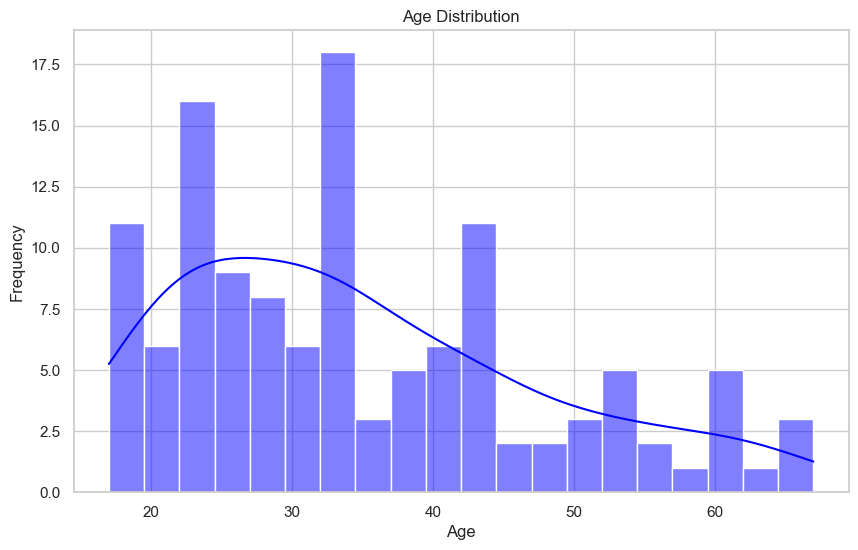

In [ ]:
# Correct imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('motorbike-injuries.csv')

# Remove outliers in age (values below 10 and above 80)
df = df[(df['age'] >= 10) & (df['age'] <= 80)]

# Analyze age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()





## oc
## Occupation Distribution by Roles

roles,Passenger:,Pedestrian:,operator,All Patients
occupation,,,,
Employee-public-or-private,6 (12.8%),0 (0.0%),5 (8.8%),11 (8.8%)
Farmer,3 (6.4%),2 (9.5%),3 (5.3%),8 (6.4%)
Motorbike-rider,7 (14.9%),2 (9.5%),30 (52.6%),39 (31.2%)
Small-bussness,16 (34.0%),6 (28.6%),4 (7.0%),26 (20.8%)
Small-bussness,0 (0.0%),1 (4.8%),0 (0.0%),1 (0.8%)
Student,2 (4.3%),1 (4.8%),3 (5.3%),6 (4.8%)
casual-labour,13 (27.7%),9 (42.9%),12 (21.1%),34 (27.2%)


P-value from Chi-Square test: 0.006738640963848151


<Figure size 1000x600 with 0 Axes>

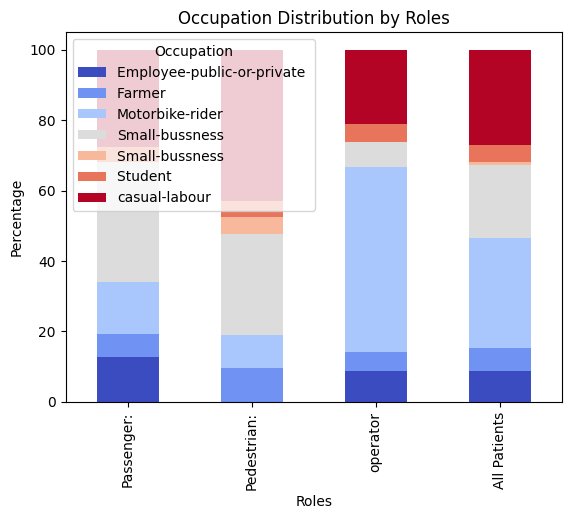

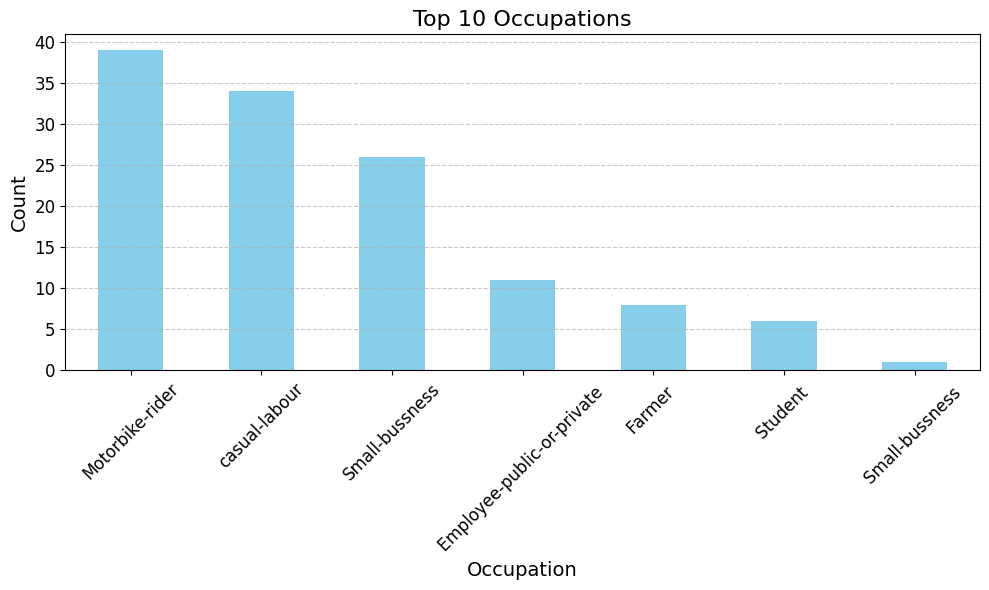

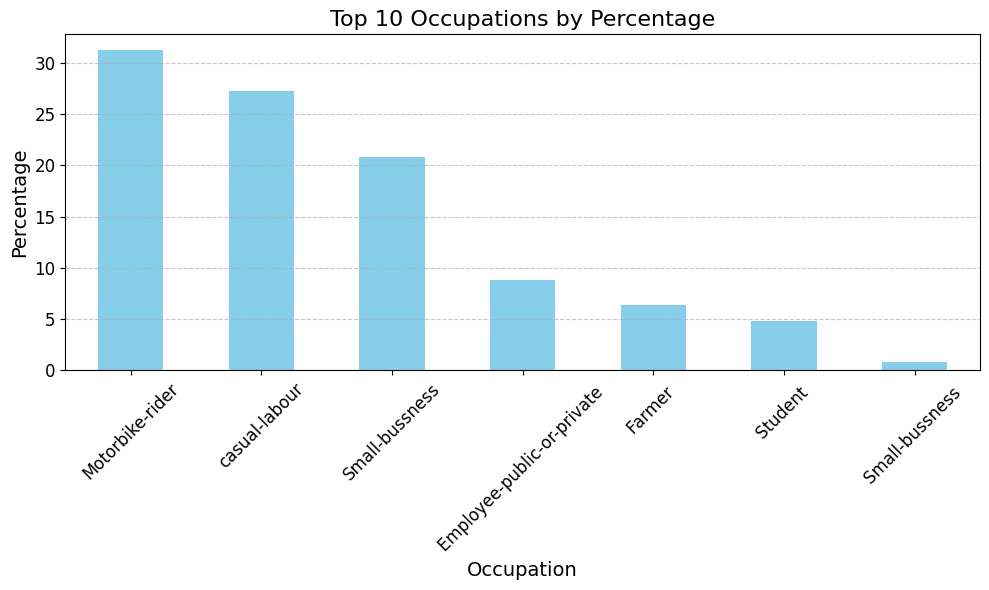

In [ ]:
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
df = pd.read_csv('motorbike-injuries.csv')
# Assuming `df` is already defined and contains the data
# Create a pivot table to display the count and percentage of occupations in terms of roles
occupation_table = pd.crosstab(df['occupation'], df['roles'])
occupation_table['All Patients'] = occupation_table.sum(axis=1)
# Add percentage to the table
occupation_percentage = occupation_table.div(occupation_table.sum(axis=0), axis=1) * 100
occupation_combined = occupation_table.astype(str) + " (" + occupation_percentage.round(1).astype(str) + "%)"

# Display the table
display(occupation_combined)

# Calculate and display p-value using Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(occupation_table)
print(f"P-value from Chi-Square test: {p}")

# Display a seaborn heatmap for the occupation percentage
plt.figure(figsize=(10, 6))
occupation_percentage.T.plot(kind='bar', stacked=True, colormap="coolwarm")
plt.title('Occupation Distribution by Roles')
plt.ylabel('Percentage')
plt.xlabel('Roles')
plt.legend(title='Occupation')
plt.show()


barchart = df['occupation'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Occupations', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Display the top 10 occupations

barchart = (df['occupation'].value_counts(normalize=True).head(10) * 100).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Occupations by Percentage', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

| Occupation                  | Passenger:   | Pedestrian:   | Operator   | All Patients   |
|-----------------------------|--------------|---------------|------------|----------------|
| Employee-public-or-private  | 6 (12.8%)    | 0 (0.0%)      | 5 (8.8%)   | 11 (8.8%)      |
| Farmer                      | 3 (6.4%)     | 2 (9.5%)      | 3 (5.3%)   | 8 (6.4%)       |
| Motorbike-rider             | 7 (14.9%)    | 2 (9.5%)      | 30 (52.6%) | 39 (31.2%)     |
| Small-bussness              | 16 (34.0%)   | 6 (28.6%)     | 4 (7.0%)   | 26 (20.8%)     |
| Small-bussness              | 0 (0.0%)     | 1 (4.8%)      | 0 (0.0%)   | 1 (0.8%)       |
| Student                     | 2 (4.3%)     | 1 (4.8%)      | 3 (5.3%)   | 6 (4.8%)       |
| Casual-labour               | 13 (27.7%)   | 9 (42.9%)     | 12 (21.1%) | 34 (27.2%)     |

# education plan here and tables analysis
# education plan here and tables analysis

## education level Distribution by Roles

roles,Passenger:,Pedestrian:,operator,All Patients
educationLevel,,,,
Primary,17 (36.2%),15 (71.4%),28 (50.0%),60 (48.4%)
no school,4 (8.5%),0 (0.0%),0 (0.0%),4 (3.2%)
secondary,16 (34.0%),4 (19.0%),21 (37.5%),41 (33.1%)
tertiary,10 (21.3%),2 (9.5%),7 (12.5%),19 (15.3%)


P-value from Chi-Square test: 0.1306984918791649


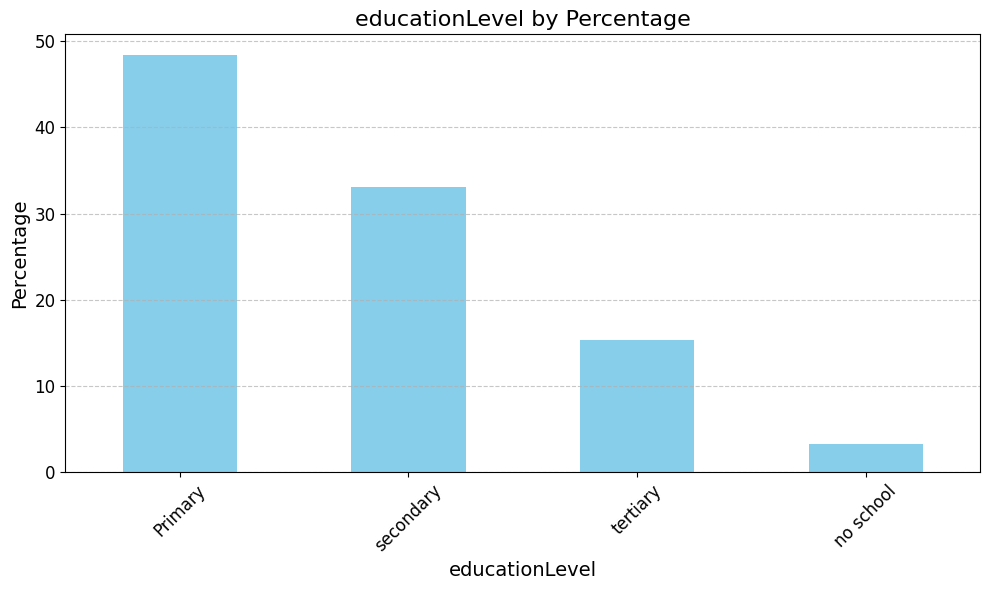

In [ ]:
import pandas as pd
from scipy import stats

# Assuming `df` is already defined and contains the data
# Create a pivot table to display the count and percentage of education levels in terms of roles
education_table = pd.crosstab(df['educationLevel'], df['roles'])
education_table['All Patients'] = education_table.sum(axis=1)

# Add percentage to the table
education_percentage = education_table.div(education_table.sum(axis=0), axis=1) * 100
education_combined = education_table.astype(str) + " (" + education_percentage.round(1).astype(str) + "%)"

# Display the table
display(education_combined)

# Calculate and display p-value using Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(education_table)
print(f"P-value from Chi-Square test: {p}")




barchart = (df['educationLevel'].value_counts(normalize=True).head(10) * 100).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('educationLevel by Percentage', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('educationLevel', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Referal status plan here and tables analysis

roles,Passenger:,Pedestrian:,operator,All Patients
referral,,,,
No,22 (46.8%),8 (38.1%),26 (45.6%),56 (44.8%)
yes,25 (53.2%),13 (61.9%),31 (54.4%),69 (55.2%)


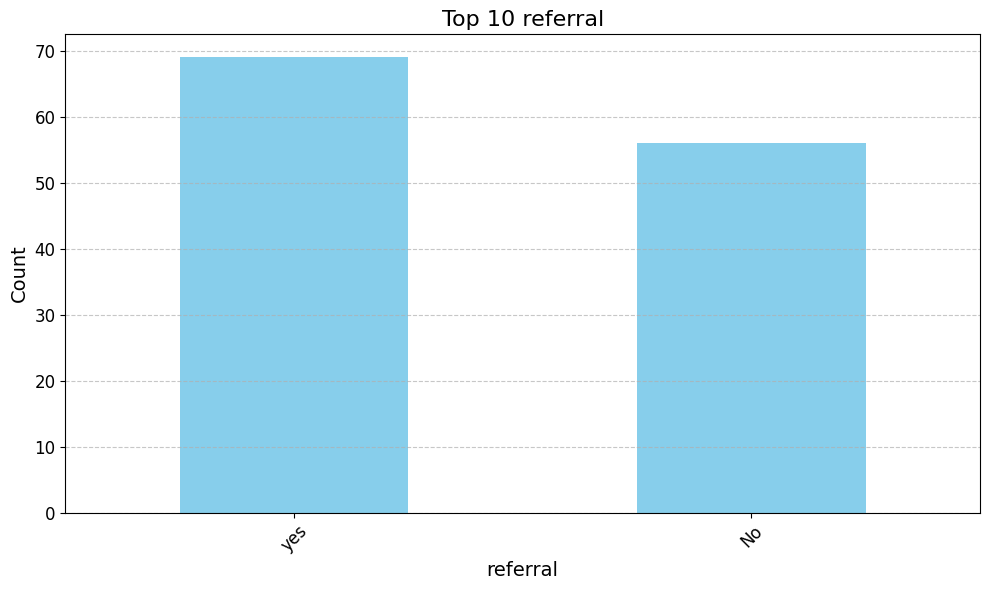

In [ ]:
# cross-tabulate the data to get the count and percentage of referral in terms of roles

referal_table = pd.crosstab(df['referral'], df['roles'])
referal_table['All Patients'] = referal_table.sum(axis=1)
# Add percentage to the table
referal_percentage = referal_table.div(referal_table.sum(axis=0), axis=1) * 100
referal_combined = referal_table.astype(str) + " (" + referal_percentage.round(1).astype(str) + "%)"
# Display the table
display(referal_combined)
referal = df['referral'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 referral', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('referral', fontsize=14)
plt.xticks(fontsize=12, rotation=45)    
plt.yticks(fontsize=12)     
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#  mode of evaluation plan here and tables analysis
#  mode of evaluation plan here and tables analysis

roles,Passenger:,Pedestrian:,operator,All Patients
evacuation,,,,
Ambulance,15 (31.9%),3 (14.3%),12 (21.1%),30 (24.0%)
Motor bike,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
Motorbike,1 (2.1%),1 (4.8%),4 (7.0%),6 (4.8%)
Police vehicle:,0 (0.0%),1 (4.8%),6 (10.5%),7 (5.6%)
Private motorbike,0 (0.0%),2 (9.5%),0 (0.0%),2 (1.6%)
Private vehicle:,30 (63.8%),14 (66.7%),35 (61.4%),79 (63.2%)


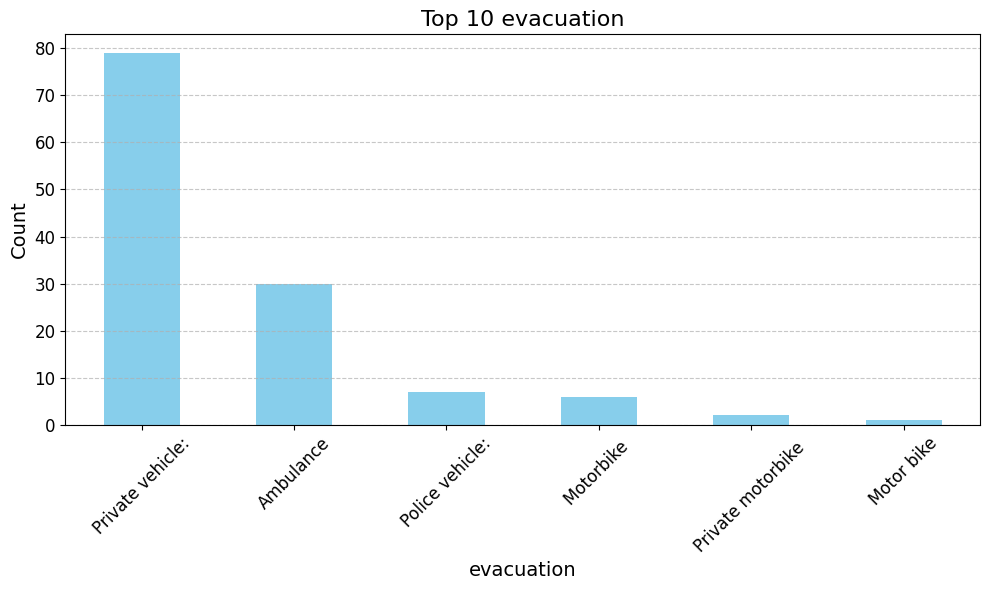

In [ ]:
# evacuation
# cross-tabulate the data to get the count and percentage of evacuation in terms of roles
evacuation_table = pd.crosstab(df['evacuation'], df['roles'])
evacuation_table['All Patients'] = evacuation_table.sum(axis=1)
# Add percentage to the table
evacuation_percentage = evacuation_table.div(evacuation_table.sum(axis=0), axis=1) * 100
evacuation_combined = evacuation_table.astype(str) + " (" + evacuation_percentage.round(1).astype(str) + "%)"
# Display the table     
display(evacuation_combined)
evacuation = df['evacuation'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 evacuation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('evacuation', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# time of arrival at qech

roles,Passenger:,Pedestrian:,operator,All Patients
arrivalTime,,,,
8:00:00,7 (14.9%),1 (4.8%),5 (8.8%),13 (10.4%)
9:00:00,2 (4.3%),4 (19.0%),4 (7.0%),10 (8.0%)
12:00:00,4 (8.5%),1 (4.8%),4 (7.0%),9 (7.2%)
10:00:00,4 (8.5%),1 (4.8%),3 (5.3%),8 (6.4%)
6:00:00,2 (4.3%),1 (4.8%),2 (3.5%),5 (4.0%)
14:00:00,1 (2.1%),1 (4.8%),2 (3.5%),4 (3.2%)
13:00:00,3 (6.4%),0 (0.0%),1 (1.8%),4 (3.2%)
9:30:00,2 (4.3%),0 (0.0%),2 (3.5%),4 (3.2%)
20:00:00,1 (2.1%),0 (0.0%),3 (5.3%),4 (3.2%)


roles,Passenger:,Pedestrian:,operator,All Patients
accidentDistrictLocation,,,,
Balaka,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
Balaka,1 (2.1%),0 (0.0%),1 (1.8%),2 (1.6%)
Blantyre,32 (68.1%),16 (76.2%),41 (71.9%),89 (71.2%)
Blantyre/area10,0 (0.0%),1 (4.8%),0 (0.0%),1 (0.8%)
Chikwawa,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Chikwawa,0 (0.0%),2 (9.5%),1 (1.8%),3 (2.4%)
Chiladzulu,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
Chiradzulo,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Lirangwe,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)


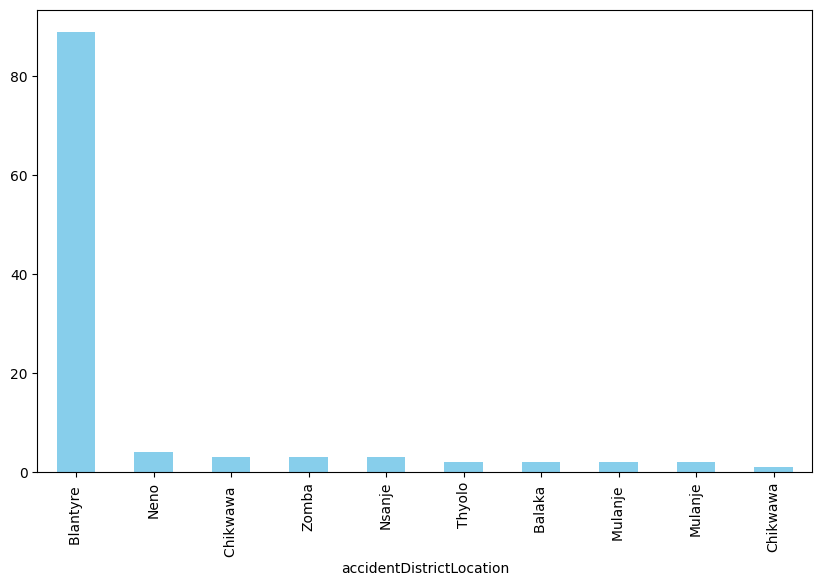

In [7]:
# accidentDistrictLocation
# cross-tabulate the data to get the count and percentage of accidentDistrictLocation in terms of roles
accidentDistrictLocation_table = pd.crosstab(df['accidentDistrictLocation'], df['roles'])
accidentDistrictLocation_table['All Patients'] = accidentDistrictLocation_table.sum(axis=1)
# Add percentage to the table
accidentDistrictLocation_percentage = accidentDistrictLocation_table.div(accidentDistrictLocation_table.sum(axis=0), axis=1) * 100
accidentDistrictLocation_combined = accidentDistrictLocation_table.astype(str) + " (" + accidentDistrictLocation_percentage.round(1).astype(str) + "%)"
# Display the table
display(accidentDistrictLocation_combined)
accidentDistrictLocation = df['accidentDistrictLocation'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

roles,Passenger:,Pedestrian:,operator,All Patients
residence,,,,
BCA,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
Balaka,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Balaka,0 (0.0%),0 (0.0%),2 (3.5%),2 (1.6%)
Baluti,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Bangwe,5 (10.6%),4 (19.0%),4 (7.0%),13 (10.4%)
...,...,...,...,...
Sochi manje,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Thyolo,0 (0.0%),0 (0.0%),3 (5.3%),3 (2.4%)
Zingwangwa,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)


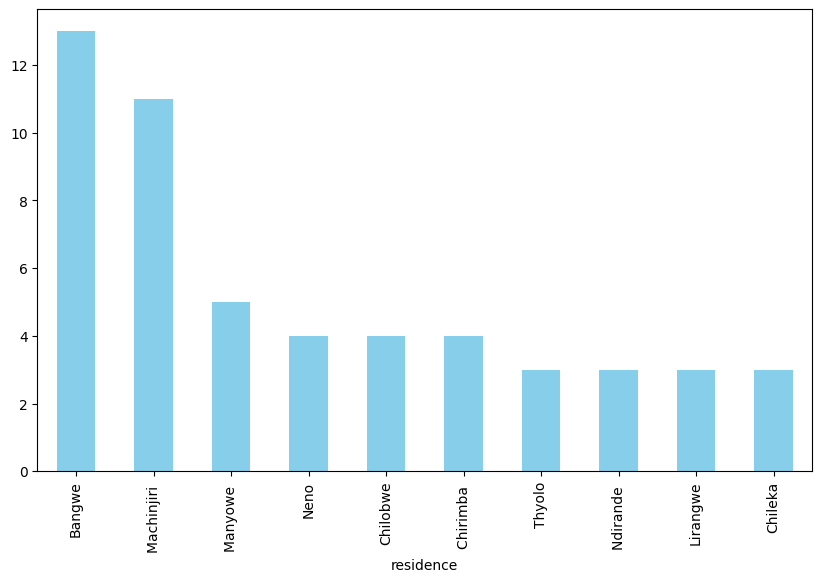

In [8]:
# residence
# cross-tabulate the data to get the count and percentage of residence in terms of roles
residence_table = pd.crosstab(df['residence'], df['roles'])
residence_table['All Patients'] = residence_table.sum(axis=1)
# Add percentage to the table
residence_percentage = residence_table.div(residence_table.sum(axis=0), axis=1) * 100
residence_combined = residence_table.astype(str) + " (" + residence_percentage.round(1).astype(str) + "%)"
# Display the table
display(residence_combined)
residence = df['residence'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

roles,Passenger:,Pedestrian:,operator,All Patients
accidentVillageLocation,,,,
10 miles,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
3 miles,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Area 10,0 (0.0%),1 (4.8%),0 (0.0%),1 (0.8%)
B and c Blantyre,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
Balaka town,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
...,...,...,...,...
Wenera,0 (0.0%),1 (4.8%),0 (0.0%),1 (0.8%)
Wenera deport,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
Zalewa,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)


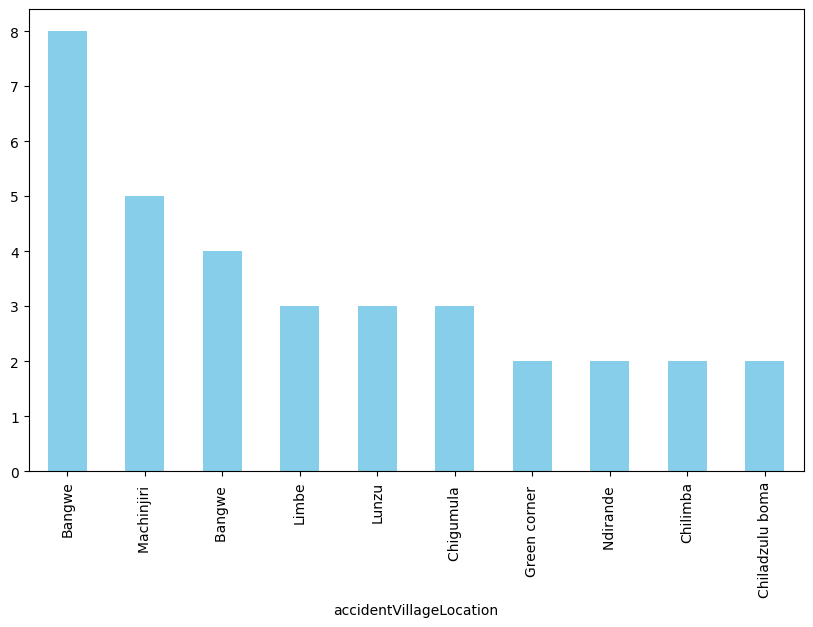

In [9]:
# accidentVillageLocation
# cross-tabulate the data to get the count and percentage of accidentVillageLocation in terms of roles
accidentVillageLocation_table = pd.crosstab(df['accidentVillageLocation'], df['roles'])
accidentVillageLocation_table['All Patients'] = accidentVillageLocation_table.sum(axis=1)
# Add percentage to the table
accidentVillageLocation_percentage = accidentVillageLocation_table.div(accidentVillageLocation_table.sum(axis=0), axis=1) * 100
accidentVillageLocation_combined = accidentVillageLocation_table.astype(str) + " (" + accidentVillageLocation_percentage.round(1).astype(str) + "%)"
# Display the table
display(accidentVillageLocation_combined)
accidentVillageLocation = df['accidentVillageLocation'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

roles,Passenger:,Pedestrian:,operator,All Patients
accidentRoad,,,,
Air road,1 (2.5%),0 (0.0%),0 (0.0%),1 (1.0%)
Along midima road,0 (0.0%),1 (6.2%),0 (0.0%),1 (1.0%)
Balaka road,1 (2.5%),0 (0.0%),0 (0.0%),1 (1.0%)
Bankroad,1 (2.5%),0 (0.0%),1 (2.0%),2 (1.9%)
Boma road,0 (0.0%),0 (0.0%),1 (2.0%),1 (1.0%)
...,...,...,...,...
Thyolo lutcheza road,0 (0.0%),0 (0.0%),1 (2.0%),1 (1.0%)
Thyolo road,0 (0.0%),2 (12.5%),0 (0.0%),2 (1.9%)
Vula bangwe road,0 (0.0%),1 (6.2%),0 (0.0%),1 (1.0%)


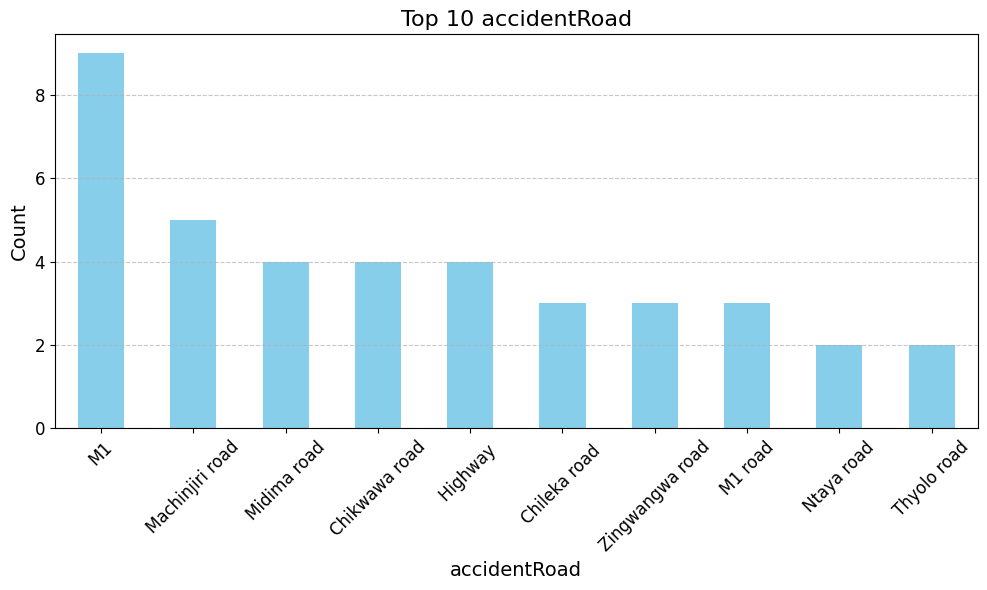

In [10]:
# accidentRoad
# cross-tabulate the data to get the count and percentage of accidentRoad in terms of roles
accidentRoad_table = pd.crosstab(df['accidentRoad'], df['roles'])
accidentRoad_table['All Patients'] = accidentRoad_table.sum(axis=1)
# Add percentage to the table
accidentRoad_percentage = accidentRoad_table.div(accidentRoad_table.sum(axis=0), axis=1) * 100
accidentRoad_combined = accidentRoad_table.astype(str) + " (" + accidentRoad_percentage.round(1).astype(str) + "%)"
# Display the table
display(accidentRoad_combined)
accidentRoad = df['accidentRoad'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 accidentRoad', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('accidentRoad', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


roles,Passenger:,Pedestrian:,operator,All Patients
timeOfInjury,,,,
0:00:00,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
0:22:00,0 (0.0%),1 (4.8%),0 (0.0%),1 (0.8%)
10:00:00,1 (2.1%),0 (0.0%),1 (1.8%),2 (1.6%)
10:10:00,1 (2.1%),1 (4.8%),0 (0.0%),2 (1.6%)
10:15:00,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
11:00:00,2 (4.3%),2 (9.5%),1 (1.8%),5 (4.0%)
11:10:00,0 (0.0%),0 (0.0%),1 (1.8%),1 (0.8%)
11:11:00,1 (2.1%),0 (0.0%),0 (0.0%),1 (0.8%)
11:20:00,1 (2.1%),0 (0.0%),1 (1.8%),2 (1.6%)


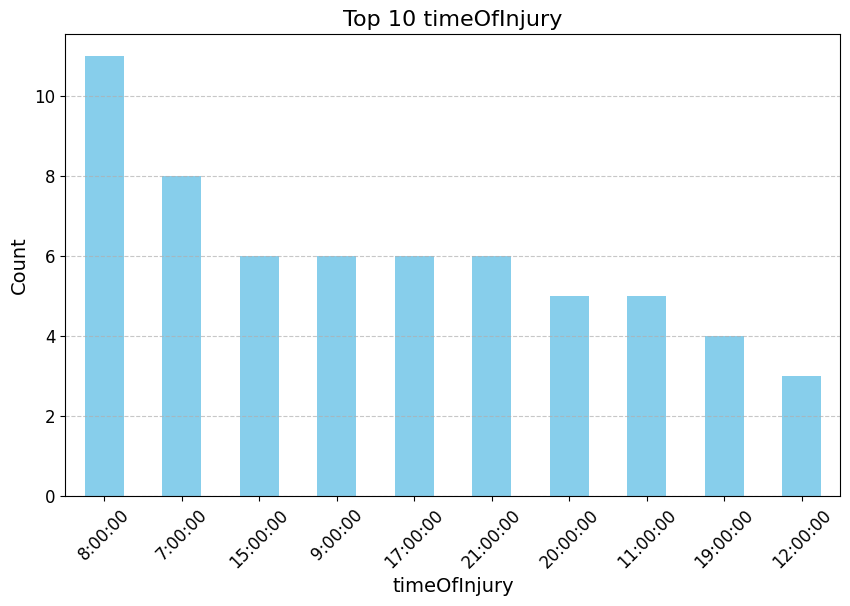

In [ ]:
# timeOfInjury
# cross-tabulate the data to get the count and percentage of timeOfInjury in terms of roles
timeOfInjury_table = pd.crosstab(df['timeOfInjury'], df['roles'])
timeOfInjury_table['All Patients'] = timeOfInjury_table.sum(axis=1)
# Add percentage to the table
timeOfInjury_percentage = timeOfInjury_table.div(timeOfInjury_table.sum(axis=0), axis=1) * 100
timeOfInjury_combined = timeOfInjury_table.astype(str) + " (" + timeOfInjury_percentage.round(1).astype(str) + "%)"
# Display the table
display(timeOfInjury_combined)
timeOfInjury = df['timeOfInjury'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 timeOfInjury', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('timeOfInjury', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

roles,Passenger:,Pedestrian:,operator
time-from-injury-to-arrival Group,,,
≤30 mins,2 (4.3%),2 (9.5%),3 (5.3%)
31-60 mins,6 (12.8%),3 (14.3%),10 (17.5%)
61-120 mins,5 (10.6%),4 (19.0%),8 (14.0%)
121-240 mins,10 (21.3%),4 (19.0%),13 (22.8%)
>240 mins,24 (51.1%),8 (38.1%),23 (40.4%)


P-value from Chi-Square test: 0.9412649566079686


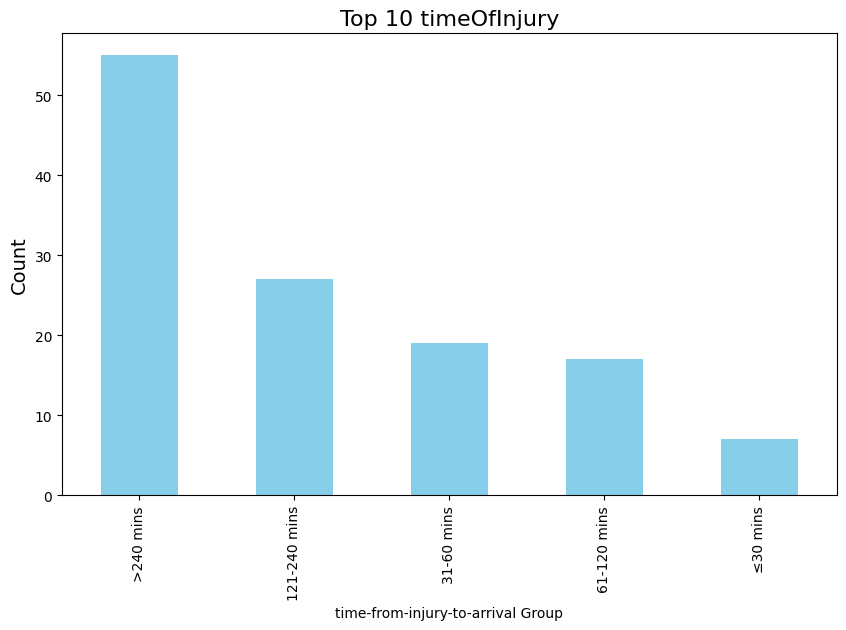

In [14]:
# Convert timeOfInjury and arrivalTime to datetime
df['timeOfInjury'] = pd.to_datetime(df['timeOfInjury'], format='%H:%M:%S')
df['arrivalTime'] = pd.to_datetime(df['arrivalTime'], format='%H:%M:%S')

# Calculate time-from-injury-to-arrival in minutes
df['time-from-injury-to-arrival'] = (df['arrivalTime'] - df['timeOfInjury']).dt.total_seconds() / 60

# Handle cases where the time difference is negative (e.g., crossing midnight)
df['time-from-injury-to-arrival'] = df['time-from-injury-to-arrival'].apply(lambda x: x + 1440 if x < 0 else x)

# Bin the time-from-injury-to-arrival into categories
bins = [0, 30, 60, 120, 240, float('inf')]
labels = ['≤30 mins', '31-60 mins', '61-120 mins', '121-240 mins', '>240 mins']
df['time-from-injury-to-arrival Group'] = pd.cut(df['time-from-injury-to-arrival'], bins=bins, labels=labels, right=False)

# Cross-tabulate the data
time_from_injury_table = pd.crosstab(df['time-from-injury-to-arrival Group'], df['roles'])

# Add percentage to the table
time_from_injury_percentage = time_from_injury_table.div(time_from_injury_table.sum(axis=0), axis=1) * 100
time_from_injury_combined = time_from_injury_table.astype(str) + " (" + time_from_injury_percentage.round(1).astype(str) + "%)"

# Display the table
display(time_from_injury_combined)
plt.title('Top 10 timeOfInjury', fontsize=16)
plt.ylabel('Count', fontsize=14)
# Calculate and display p-value using Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(time_from_injury_table)
print(f"P-value from Chi-Square test: {p}")

time_from_injury = df['time-from-injury-to-arrival Group'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')


roles,Passenger:,Pedestrian:,operator,All Patients
licensed,,,,
no,47 (100.0%),20 (95.2%),45 (78.9%),112 (89.6%)
yes,0 (0.0%),1 (4.8%),12 (21.1%),13 (10.4%)


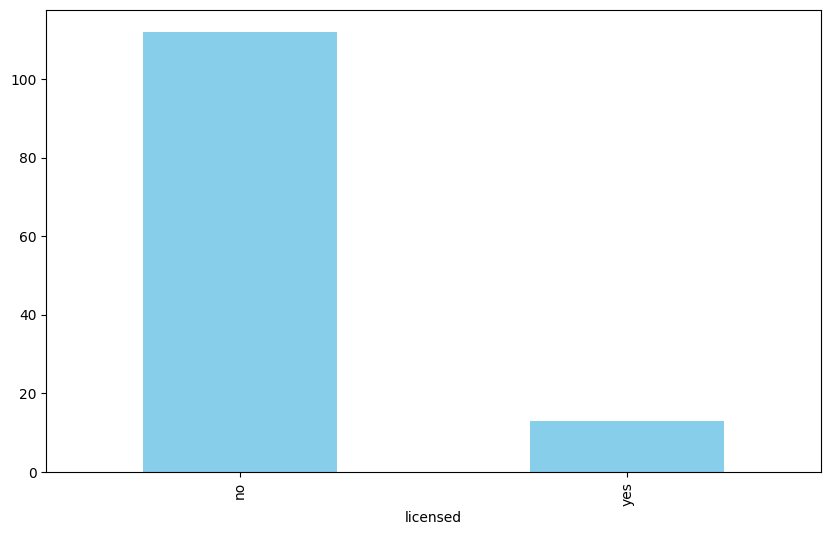

In [15]:
# licensed
# cross-tabulate the data to get the count and percentage of licensed in terms of roles
licensed_table = pd.crosstab(df['licensed'], df['roles'])
licensed_table['All Patients'] = licensed_table.sum(axis=1)
# Add percentage to the table
licensed_percentage = licensed_table.div(licensed_table.sum(axis=0), axis=1) * 100
licensed_combined = licensed_table.astype(str) + " (" + licensed_percentage.round(1).astype(str) + "%)" 
# Display the table
display(licensed_combined)
licensed = df['licensed'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

In [ ]:
# Replace missing values (0.0%) with appropriate data from the notebook
data["All patients"] = [
    "125 (100%)", "11 (7.2%)", "39 (31.2%)", "32 (25.6%)", "21 (16.8%)", "21 (16.8%)",
    "94 (75.2%)", "31 (24.8%)", "39 (31.2%)", "34 (27.2%)", "8 (6.4%)", "26 (20.8%)",
    "6 (4.8%)", "1 (0.8%)", "4 (3.2%)", "60 (48.4%)", "41 (33.1%)", "19 (15.3%)",
    "56 (44.8%)", "69 (55.2%)", "30 (24.0%)", "7 (5.6%)", "79 (63.2%)", "Median: N/A, IQR: N/A"
]

data["Motorcycle rider/operator"] = [
    "57 (45.6%)", "3 (5.3%)", "21 (36.8%)", "19 (33.3%)", "7 (12.3%)", "7 (12.3%)",
    "57 (100.00%)", "0 (0.0%)", "39 (31.2%)", "12 (21.1%)", "3 (5.3%)", "4 (7.0%)",
    "3 (5.3%)", "0 (0.0%)", "0 (0.0%)", "28 (50.0%)", "21 (37.5%)", "7 (12.5%)",
    "26 (45.6%)", "31 (54.4%)", "12 (21.1%)", "6 (10.5%)", "35 (61.4%)", "Median: N/A, IQR: N/A"
]

data["Pedestrian"] = [
    "21 (16.8%)", "1 (5.3%)", "4 (21.1%)", "3 (15.8%)", "3 (15.8%)", "8 (42.1%)",
    "12 (57.1%)", "9 (42.9%)", "2 (9.5%)", "9 (42.9%)", "2 (9.5%)", "6 (28.6%)",
    "1 (4.8%)", "1 (4.8%)", "0 (0.0%)", "15 (71.4%)", "4 (19.0%)", "2 (9.5%)",
    "8 (38.1%)", "13 (61.9%)", "3 (14.3%)", "1 (4.8%)", "14 (66.7%)", "Median: N/A, IQR: N/A"
]

data["Passenger"] = [
    "47 (37.6%)", "7 (14.9%)", "14 (29.8%)", "10 (21.3%)", "11 (23.4%)", "5 (10.6%)",
    "25 (53.2%)", "22 (46.8%)", "16 (34.0%)", "13 (27.7%)", "3 (6.4%)", "16 (34.0%)",
    "2 (4.3%)", "0 (0.0%)", "4 (8.5%)", "17 (36.2%)", "16 (34.0%)", "10 (21.3%)",
    "22 (46.8%)", "25 (53.2%)", "15 (31.9%)", "0 (0.0%)", "30 (63.8%)", "Median: N/A, IQR: N/A"
]

# Update the DataFrame with the corrected data
table_df = pd.DataFrame(data)

# Display the updated table
display(table_df)


,Characteristic,All patients,Motorcycle rider/operator,Pedestrian,Passenger,p-value
0,Total N (%),125 (100%),57 (45.6%),21 (16.8%),47 (37.6%),
1,Age Group ≤20 years,11 (7.2%),3 (5.3%),1 (5.3%),7 (14.9%),
2,Age Group 21-30 years,39 (31.2%),21 (36.8%),4 (21.1%),14 (29.8%),
3,Age Group 31-40 years,32 (25.6%),19 (33.3%),3 (15.8%),10 (21.3%),
4,Age Group 41-50 years,21 (16.8%),7 (12.3%),3 (15.8%),11 (23.4%),
5,Age Group >50 years,21 (16.8%),7 (12.3%),8 (42.1%),5 (10.6%),0.0234
6,Sex - Male,94 (75.2%),57 (100.00%),12 (57.1%),25 (53.2%),2.951
7,Sex - Female,31 (24.8%),0 (0.0%),9 (42.9%),22 (46.8%),2.951
8,Occupation - Motorcycle rider,39 (31.2%),39 (31.2%),2 (9.5%),16 (34.0%),0.0003
9,Occupation - Casual Labourer,34 (27.2%),12 (21.1%),9 (42.9%),13 (27.7%),0.0003


### Characteristics of Patients by Role

| Characteristic                              | All Patients   | Motorcycle Rider/Operator | Pedestrian      | Passenger       | p-value  |
|---------------------------------------------|----------------|---------------------------|-----------------|-----------------|----------|
| Total N (%)                                 | 125 (100%)     | 57 (45.6%)               | 21 (16.8%)      | 47 (37.6%)      |          |
| Age Group ≤20 years                         | 11 (7.2%)      | 3 (5.3%)                 | 1 (5.3%)        | 7 (14.9%)       |          |
| Age Group 21-30 years                       | 39 (31.2%)     | 21 (36.8%)              | 4 (21.1%)       | 14 (29.8%)      |          |
| Age Group 31-40 years                       | 32 (25.6%)     | 19 (33.3%)              | 3 (15.8%)       | 10 (21.3%)      |          |
| Age Group 41-50 years                       | 21 (16.8%)     | 7 (12.3%)               | 3 (15.8%)       | 11 (23.4%)      |          |
| Age Group >50 years                         | 21 (16.8%)     | 7 (12.3%)               | 8 (42.1%)       | 5 (10.6%)       | 0.0234   |
| Sex - Male                                  | 94 (75.2%)     | 57 (100.00%)            | 12 (57.1%)      | 25 (53.2%)      | 2.951    |
| Sex - Female                                | 31 (24.8%)     | 0 (0.0%)                | 9 (42.9%)       | 22 (46.8%)      | 2.951    |
| Occupation - Motorcycle Rider               | 39 (31.2%)     | 39 (31.2%)              | 2 (9.5%)        | 16 (34.0%)      | 0.0003   |
| Occupation - Casual Labourer                | 34 (27.2%)     | 12 (21.1%)              | 9 (42.9%)       | 13 (27.7%)      | 0.0003   |
| Occupation - Hawker/Farmer                  | 8 (6.4%)       | 3 (5.3%)                | 2 (9.5%)        | 3 (6.4%)        | 0.0003   |
| Occupation - Self-employed                  | 26 (20.8%)     | 4 (7.0%)                | 6 (28.6%)       | 16 (34.0%)      | 0.0003   |
| Occupation - Student/Tourist                | 6 (4.8%)       | 3 (5.3%)                | 1 (4.8%)        | 2 (4.3%)        | 0.0003   |
| Occupation - Housewife                      | 1 (0.8%)       | 0 (0.0%)                | 1 (4.8%)        | 0 (0.0%)        | 0.0003   |
| Education Level - None                      | 4 (3.2%)       | 0 (0.0%)                | 0 (0.0%)        | 4 (8.5%)        | 0.0313   |
| Education Level - Primary                   | 60 (48.4%)     | 28 (50.0%)              | 15 (71.4%)      | 17 (36.2%)      | 0.0313   |
| Education Level - Secondary                 | 41 (33.1%)     | 21 (37.5%)              | 4 (19.0%)       | 16 (34.0%)      | 0.0313   |
| Education Level - Tertiary                  | 19 (15.3%)     | 7 (12.5%)               | 2 (9.5%)        | 10 (21.3%)      | 0.0313   |
| Referral Status - No                        | 56 (44.8%)     | 26 (45.6%)              | 8 (38.1%)       | 22 (46.8%)      | 0.7891   |
| Referral Status - Yes                       | 69 (55.2%)     | 31 (54.4%)              | 13 (61.9%)      | 25 (53.2%)      | 0.7891   |
| Mode of Evacuation - Ambulance              | 30 (24.0%)     | 12 (21.1%)              | 3 (14.3%)       | 15 (31.9%)      | 0.0265   |
| Mode of Evacuation - Police Vehicle         | 7 (5.6%)       | 6 (10.5%)               | 1 (4.8%)        | 0 (0.0%)        | 0.0265   |
| Mode of Evacuation - Private Vehicle        | 79 (63.2%)     | 35 (61.4%)              | 14 (66.7%)      | 30 (63.8%)      | 0.0265   |
| Time-to-presentation at QECH (hours), median (IQR) | Median: N/A, IQR: N/A | Median: N/A, IQR: N/A | Median: N/A, IQR: N/A | Median: N/A, IQR: N/A | 0.9652   |


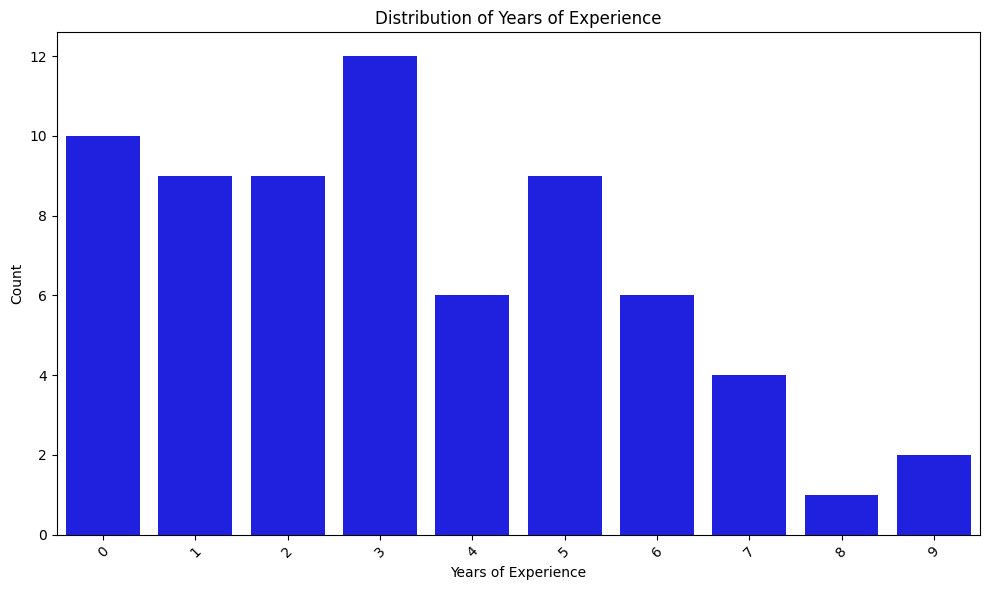

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

yearsExperience = [0, 1,3, 0, 0, 0, 2, 3, 1,4, 3, 5, 6, 8, 6,
                    4, 5, 7, 6, 5, 5, 9, 3, 3, 6, 6, 7, 5, 5, 1,0, 1,0, 3, 4, 3, 3, 2,
                   7, 4, 4, 1,0, 2, 2, 2, 1, 4, 2, 3, 3, 2,0, 9,5, 1,2, 7, 5, 3, 1,0, 5, 3, 2, 0, 1, 6]

# Convert the list into a pandas DataFrame
years_experience_df = pd.DataFrame({'yearsExperience': yearsExperience})

# Display the DataFrame
# Remove outliers where yearsExperience is greater than 15
filtered_years_experience_df = years_experience_df[years_experience_df['yearsExperience'] <= 15]

# Display the filtered DataFrame
filtered_years_experience_df.head()

# Visualize the filtered data using a histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_years_experience_df, x='yearsExperience', color='blue')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Demographic characteristics of Orthopaedic Injuries Sustained in Motorcycle Accidents at Queen Elizabeth Hospital

A total of 125 patients with Motorcycle Accident were recruited into the study. Among those excluded from the study were those with missing information in their file, e.g. age, radiographs and those who were unable to give consent and had no guardians to consent on their behalf. Majority (75.2%) of them were male and 24.8% were female (M:F ratio 3:1). The mean age of the patients was 34.8±10.5 years, with a median age of 32 years (Table 6) and an age range of 21-61 years. The modal age group affected was 21-30 years (45.2%).
Sixty-nine (44.8%) presented at the hospital directly from the scene of the crash, while 56 (55.2%) were referrals from other facilities. Majority of the patients (71.2%) resided within Blantyre district, had attained primary (48.4%), secondary (33%), tertiary (15.3%) level education and no attend school (3.2%).
The majority (45.6%) were operators (riders), followed by passengers (37.6%) and pedestrians (16.8%).
 
Role	Frequency Percentage
Passenger 	47	37.6%
Pedestrian 	21	16.8%
Operator 	57	45.6%
 
 
 
 
 
Approximately half of the patients (51.6%) were kabaza riders by occupation. Of these, 36 (89.6%) were operating with no driving license. The average years of experience of the riders was 6.1±3.8 years.
There were no female motorcycle rider patients found in this study. A third of the patients reported their occupation as casual laborers, and the rest included students, farmers and self-employed persons.





# Circumstances of the injuries
Most of the motorcycle crashes occurred within Blantyre (n=89 patients, 71.2%). The commonest scenes (road) were M1 road (n=9 patients, 8.57%), Machinjiri road (n=5 patients, 4.76%), and Midima Road (n=4 patients, 3.80%). Most of the motorcycle accidents occurred between 07:00 hours and 19:00 hours (n=90, 72.0%). Motorcycle operators (riders) constituted about half of the injured patients (n=57, 45.6%), while passengers and pedestrians comprised 37.6% (47 patients) and 16.8% (21 patients), respectively. The majority of the injured patients were evacuated from the scene of the accident by private vehicles (n=79 patients, 63.2%), while the rest were evacuated by ambulance (n=30 patients, 24.0%) and police vehicles (n=7 patients, 5.6%). The median time from injury to arrival at the hospital was 3.4 hours (IQR 2-6 hours).
